In [9]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from model import Model, learning

In [84]:
n = 400
m = 30

num = 10000

number_of_s = 100

S = torch.tensor(([[1/(i-1+1e-5)] for i in range(1,number_of_s+1)]))



n_instances = len(S)

X = np.random.rand(num, n)
importances = torch.tensor([1 for k in range(n)])

In [85]:
no_linear_model = learning(Model(n, m, S,  n_instances), X, importances, 10000)

100%|█████████████████████████████████████| 10000/10000 [12:58<00:00, 12.84it/s]


In [121]:
def paint_(model, m, number_of_s):
    y = m / torch.norm(model.W, p='fro', dim=[1,2]) ** 2
    plt.plot(np.linspace(1, 10, number_of_s), y.detach().numpy())
    
    plt.xscale('log')
    #plt.grid()

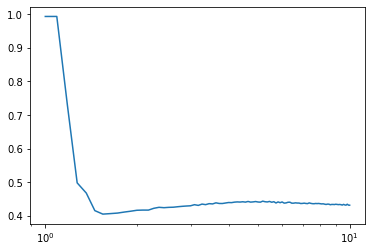

In [122]:
paint_(no_linear_model, m, number_of_s)

In [139]:
def count_dimensionality(model):
    
    W = model.W.detach()
    W_norm = torch.linalg.norm(W, 2, dim=-1, keepdim=True)
    print(W_norm.shape)
    interference = torch.einsum('ifh,igh->ifg', W / (1e-5 + W_norm), W)
    interference[:, torch.arange(n), torch.arange(n)] = 0
    polysemanticity = torch.linalg.norm(interference, dim=-1).cpu()
    
    print( W_norm.shape, polysemanticity.shape)
 
    
    D_tensor = (W_norm.reshape(W_norm.shape[0], W_norm.shape[1]) ** 2 )/ (polysemanticity ** 2)
    print( D_tensor.shape)
    plt.scatter(D_tensor, D_tensor)
    return D_tensor

torch.Size([100, 400, 1])
torch.Size([100, 400, 1]) torch.Size([100, 400])
torch.Size([100, 400])


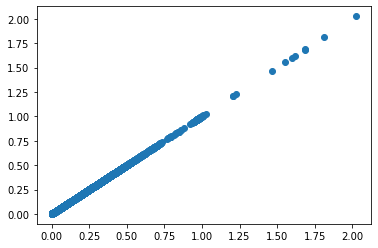

In [140]:
a = count_dimensionality(no_linear_model)